In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import sequence
from tensorflow import keras
# from pythainlp import word_vector
import re,string
from numpy import argmax
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import random
from sklearn.model_selection import train_test_split

In [ ]:
random.seed(1)

In [ ]:
def clean_msg(msg):
    # ลบ text ที่อยู่ในวงเล็บ <> ทั้งหมด
    msg = re.sub(r'<*?>','', msg)
    msg = re.sub(r'\d+', '',msg)
    # ลบ hashtag
    msg = re.sub(r'#','',msg)
    msg = re.sub(r'-','',msg)
    msg = re.sub(r'ฯ','',msg)
    msg = re.sub(r'ๆ','',msg)
    msg = re.sub(r'!@#$','',msg)
    msg = re.sub(r'[a-zA-Z]','',msg)
    # ลบ เครื่องหมายคำพูด (punctuation)
    for c in string.punctuation:
        msg = re.sub(r'\{}'.format(c),'',msg)
    # ลบ separator เช่น \n \t
    msg = ' '.join(msg.split())
    
    return msg

In [ ]:
input_txt = open("corpus.txt","r",encoding='utf-8')
text = input_txt.read()
txt = clean_msg(text)
input_txt.close()
corpus = txt.split()
# corpus = list(dict.fromkeys(corpus))
print(corpus)
print(len(corpus))

['พยากรณ์อากาศ', 'ชั่วโมงข้างหน้า', 'บริเวณความกดอากาศสูงหรือมวลอากาศเย็นกำลังปานกลางจากประเทศจีนแผ่ปกคลุมประเทศไทยตอนบน', 'ประกอบกับมีหย่อมความกดอากาศต่ำปกคลุมบริเวณประเทศกัมพูชา', 'ลักษณะเช่นนี้ทำให้ประเทศไทยตอนบนมีฝนเกิดขึ้น', 'กับมีอากาศเย็น', 'ส่วนบริเวณยอดดอยและยอดภู', 'มีอากาศหนาว', 'สำหรับมรสุมตะวันออกเฉียงเหนือพัดปกคลุมอ่าวไทยและภาคใต้', 'ทำให้ภาคใต้มีฝนตกต่อเนื่อง', 'อนึ่ง', 'พายุโซนร้อน', 'อัสนี', 'พายุระดับ', 'บริเวณตะวันตกเฉียงใต้ของเกาะไต้หวัน', 'มีแนวโน้มที่จะอ่อนกำลังลง', 'และไม่มีผลกระทบต่อประเทศไทย', 'ในช่วงวันที่', 'บริเวณความกดอากาศสูงหรือมวลอากาศเย็นกำลังปานกลางจากประเทศจีนปกคลุมประเทศไทยตอนบน', 'ประกอบกับมีหย่อมความกดอากาศต่ำปกคลุมบริเวณประเทศกัมพูชา', 'ลักษณะเช่นนี้ทำให้บริเวณประเทศไทยตอนบนมีอากาศเย็นกับมีฝนเล็กน้อยถึงปานกลาง', 'โดยเฉพาะบริเวณภาคตะวันออกเฉียงเหนือตอนล่างและภาคตะวันออก', 'สำหรับภาคใต้ตอนล่างมีฝนตกหนักบางแห่ง', 'เนื่องจากมรสุมตะวันออกเฉียงเหนือพัดปกคลุมอ่าวไทยและภาคใต้', 'ส่วนในช่วงวันที่', 'บริเวณความกดอากาศสูงหรือมวลอากาศเย็นกำลังค่อนข้างแรงอีกระ

In [ ]:
maxlen = 100
minlen = 5
good_sen1 = []
for i in corpus:
    if len(i) <= maxlen and len(i) >= minlen:
        good_sen1.append(i)

In [ ]:
good_sen, testing = train_test_split(good_sen1, test_size = 0.1, random_state = 2)

In [ ]:
thai_letters = 'กขฃคฅฆงจฉชซฌญฎฏฐฑฒณดตถทธนบปผฝพฟภมยรฤฤๅลฦฦๅวศษสหฬอฮะัาำิีึืุูเแโใไ็่้๊๋์'
thai_letters1 = 'กขฃคฅฆงจฉชซฌญฎฏฐฑฒณดตถทธนบปผฝพฟภมยรฤฤๅลฦฦๅวศษสหฬอฮ'
input_characters = []
target_characters = []
for i in thai_letters:
    input_characters.append(i)
    target_characters.append(i)
letters = []
for j in thai_letters1:
    letters.append(j)

In [ ]:
target_characters = ['\t'] + ["\n"] +[' '] +['“'] +['”']+ target_characters
input_characters = [' '] +['“']+['”']+ input_characters

In [ ]:
to_noise = []
for i in good_sen:
    to_noise.append(i)
# print(to_noise)

In [ ]:
def Convert(string): 
    list1=[] 
    list1[:0]=string 
    return list1

In [ ]:
noise = []
for i in to_noise:
    n = Convert(i)
    if len(i) >= 20 and len(i) <= 50:
        for k in range(4):
            x = random.randint(1, len(i)-1)
            y = random.randint(0, len(thai_letters1)-1)
            n[x] = thai_letters1[y]
    elif len(i) > 50:
        for k in range(5):
            x = random.randint(1, len(i)-1)
            y = random.randint(0, len(thai_letters1)-1)
            n[x] = thai_letters1[y]
    else:
        x = random.randint(1, len(i)-1)
        y = random.randint(0, len(thai_letters1)-1)
        n[x] = thai_letters1[y]
    nos = ''.join(n)
    noise.append(nos)
print(len(noise))

11334


In [ ]:
noise_test = []
for i in testing:
    n = Convert(i)
    if len(i) >= 20 and len(i) <= 50:
        for k in range(4):
            x = random.randint(1, len(i)-1)
            y = random.randint(0, len(thai_letters1)-1)
            n[x] = thai_letters1[y]
    elif len(i) > 50:
        for k in range(5):
            x = random.randint(1, len(i)-1)
            y = random.randint(0, len(thai_letters1)-1)
            n[x] = thai_letters1[y]
    else:
        x = random.randint(1, len(i)-1)
        y = random.randint(0, len(thai_letters1)-1)
        n[x] = thai_letters1[y]
    nos = ''.join(n)
    noise_test.append(nos)
print(len(noise_test))

1260


In [ ]:
input_texts = []
target_texts = []

In [ ]:
for data in good_sen:
#     input_texts.append(data)
    # input_texts.append(data)
    target_texts.append('\t'+data+'\n')
for nos in noise:
    input_texts.append(nos)

In [ ]:
test_inputs = []
test_targets = []
for data in testing:
#     input_texts.append(data)
    test_targets.append('\t'+data+'\n')
for nos in noise_test:
    test_inputs.append(nos)

In [ ]:
print(len(test_inputs))
print(len(test_targets))
print(len(input_texts))
print(len(target_texts))
# print(target_texts)

1260
1260
11334
11334


In [ ]:
num_encoder_tokens = len(input_characters)
num_decoder_tokens = len(target_characters)
max_encoder_seq_length = max([len(txt) for txt in input_texts])
max_decoder_seq_length = max([len(txt) for txt in target_texts])

In [ ]:
print("Number of samples:", len(input_texts))
print("Number of samples for test:", len(testing))
print("Number of unique input tokens:", num_encoder_tokens)
print("Number of unique output tokens:", num_decoder_tokens)
print("Max sequence length for inputs:", max_encoder_seq_length)
print("Max sequence length for outputs:", max_decoder_seq_length)

Number of samples: 11334
Number of samples for test: 1260
Number of unique input tokens: 74
Number of unique output tokens: 76
Max sequence length for inputs: 99
Max sequence length for outputs: 101


In [ ]:
input_token_index = dict([(char, i) for i, char in enumerate(input_characters)])
target_token_index = dict([(char, i) for i, char in enumerate(target_characters)])

In [ ]:
encoder_input_data_test = np.zeros(
    (len(test_inputs), max_encoder_seq_length, num_encoder_tokens), dtype="float32"
)
decoder_input_data_test = np.zeros(
    (len(test_inputs), max_decoder_seq_length, num_decoder_tokens), dtype="float32"
)
decoder_target_data_test = np.zeros(
    (len(test_inputs), max_decoder_seq_length, num_decoder_tokens), dtype="float32"
)
print(encoder_input_data_test.shape)

(1260, 99, 74)


In [ ]:
encoder_input_data = np.zeros(
    (len(input_texts), max_encoder_seq_length, num_encoder_tokens), dtype="float32"
)
decoder_input_data = np.zeros(
    (len(input_texts), max_decoder_seq_length, num_decoder_tokens), dtype="float32"
)
decoder_target_data = np.zeros(
    (len(input_texts), max_decoder_seq_length, num_decoder_tokens), dtype="float32"
)
print(len(encoder_input_data))

11334


In [ ]:
for i, (input_text, target_text) in enumerate(zip(input_texts, target_texts)):
    for t, char in enumerate(input_text):
        encoder_input_data[i, t, input_token_index[char]] = 1.0
    encoder_input_data[i, t + 1 :, input_token_index[" "]] = 1.0
    for t, char in enumerate(target_text):
        # decoder_target_data is ahead of decoder_input_data by one timestep
        decoder_input_data[i, t, target_token_index[char]] = 1.0
        if t > 0:
            # decoder_target_data will be ahead by one timestep
            # and will not include the start character.
            decoder_target_data[i, t - 1, target_token_index[char]] = 1.0
    decoder_input_data[i, t + 1 :, target_token_index[" "]] = 1.0
    decoder_target_data[i, t:, target_token_index[" "]] = 1.0

for i, (test_input, test_target) in enumerate(zip(test_inputs,test_targets)):
    for t, char in enumerate(test_input):
        encoder_input_data_test[i, t, input_token_index[char]] = 1.0
    encoder_input_data_test[i, t + 1 :, input_token_index[" "]] = 1.0
    for t, char in enumerate(test_target):
        # decoder_target_data is ahead of decoder_input_data by one timestep
        decoder_input_data_test[i, t, target_token_index[char]] = 1.0
        if t > 0:
            # decoder_target_data will be ahead by one timestep
            # and will not include the start character.
            decoder_target_data_test[i, t - 1, target_token_index[char]] = 1.0
    decoder_input_data_test[i, t + 1 :, target_token_index[" "]] = 1.0
    decoder_target_data_test[i, t:, target_token_index[" "]] = 1.0

In [ ]:
batch_size = 64  # Batch size for training.
epochs = 100  # Number of epochs to train for.
latent_dim = 256  # Latent dimensionality of the encoding space.
# num_samples = 10000  # Number of samples to train on.
# # Path to the data txt file on disk.
# data_path = "fra.txt"

In [ ]:
print(encoder_input_data_test.shape)
print(decoder_input_data_test.shape)
print(decoder_target_data_test.shape)

(1260, 99, 74)
(1260, 101, 76)
(1260, 101, 76)


In [ ]:
print(encoder_input_data.shape)
print(decoder_input_data.shape)
print(decoder_target_data.shape)

(11334, 99, 74)
(11334, 101, 76)
(11334, 101, 76)


In [ ]:
encoder_inputs = keras.Input(shape=(None, num_encoder_tokens))
encoder = keras.layers.GRU(latent_dim, return_state=True)
encoder_outputs, state_h = encoder(encoder_inputs)
encoder_state = encoder(encoder_inputs)

decoder_inputs = keras.Input(shape=(None, num_decoder_tokens))
decoder_gru = keras.layers.GRU(latent_dim, return_sequences=True)
decoder_outputs = decoder_gru(decoder_inputs, initial_state=state_h)
decoder_dense = keras.layers.Dense(num_decoder_tokens, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)
model = keras.Model([encoder_inputs, decoder_inputs], decoder_outputs)


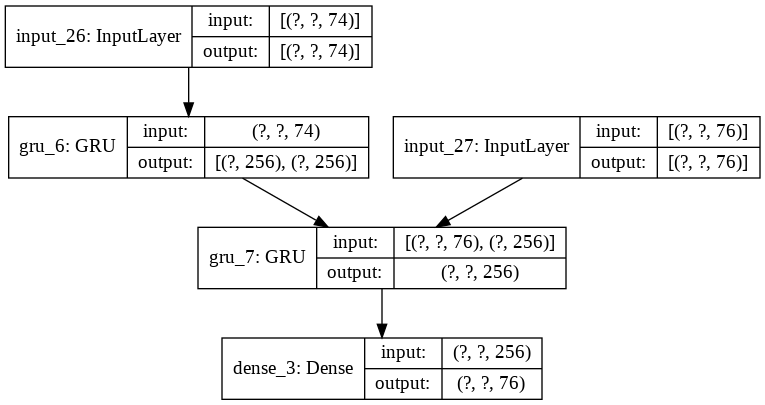

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=["accuracy"])

In [ ]:
history = model.fit([encoder_input_data, decoder_input_data], decoder_target_data,
          batch_size=batch_size,
          epochs=epochs,
          validation_split=0.2)
model.save('s2s')

Epoch 1/100
142/142 [==============================] - 4s 28ms/step - loss: 0.7687 - accuracy: 0.8342 - val_loss: 0.5427 - val_accuracy: 0.8671
Epoch 2/100
142/142 [==============================] - 3s 23ms/step - loss: 0.4004 - accuracy: 0.9042 - val_loss: 0.2850 - val_accuracy: 0.9314
Epoch 3/100
142/142 [==============================] - 3s 23ms/step - loss: 0.2294 - accuracy: 0.9432 - val_loss: 0.1966 - val_accuracy: 0.9516
Epoch 4/100
142/142 [==============================] - 3s 23ms/step - loss: 0.1609 - accuracy: 0.9602 - val_loss: 0.1482 - val_accuracy: 0.9636
Epoch 5/100
142/142 [==============================] - 3s 23ms/step - loss: 0.1200 - accuracy: 0.9708 - val_loss: 0.1151 - val_accuracy: 0.9728
Epoch 6/100
142/142 [==============================] - 3s 23ms/step - loss: 0.0930 - accuracy: 0.9774 - val_loss: 0.0972 - val_accuracy: 0.9765
Epoch 7/100
142/142 [==============================] - 3s 23ms/step - loss: 0.0755 - accuracy: 0.9816 - val_loss: 0.0812 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


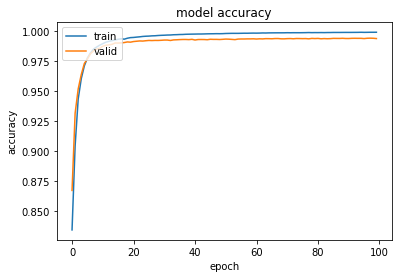

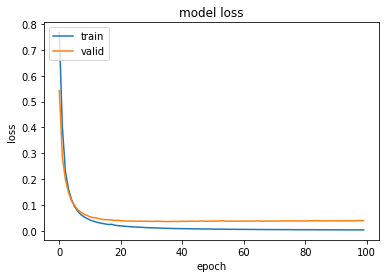

In [ ]:
import matplotlib.pyplot as plt
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [ ]:
scores = model.evaluate([encoder_input_data_test, decoder_input_data_test],decoder_target_data_test)
print('\n')
# print(f"{model.metrics_names[1]}    |    {model.metrics_names[2]}   |  {model.metrics_names[3]}")
# print(f"{scores[3] * 100:.2f}            {scores[3] * 100:.2f}             {scores[3] * 100:.2f}")
print(f"{model.metrics_names[1]}: {scores[1] * 100:.2f}")
# print(scores)

40/40 [==============================] - 0s 11ms/step - loss: 0.0311 - accuracy: 0.9947


accuracy: 99.47


In [ ]:
encoder_inputs = keras.Input(shape=(None, num_encoder_tokens))
encoder = keras.layers.GRU(latent_dim, return_state=True)
encoder_outputs, state_h = encoder(encoder_inputs)

decoder_inputs = keras.Input(shape=(None, num_decoder_tokens))
decoder_gru = keras.layers.GRU(latent_dim, return_sequences=True)
decoder_outputs = decoder_gru(decoder_inputs, initial_state=state_h)
decoder_dense = keras.layers.Dense(num_decoder_tokens, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)
model = keras.Model([encoder_inputs, decoder_inputs], decoder_outputs)

In [ ]:
model = keras.models.load_model("s2s")

In [ ]:
encoder_model = keras.Model(encoder_inputs, encoder_states)

decoder_state_input_h = keras.Input(shape=(latent_dim,))
decoder_state_input_c = keras.Input(shape=(latent_dim,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
decoder_outputs, state_h, state_c = decoder_lstm(decoder_inputs, initial_state=decoder_states_inputs)
decoder_states = [state_h, state_c]
decoder_outputs = decoder_dense(decoder_outputs)
decoder_model = keras.Model([decoder_inputs] + decoder_states_inputs, [decoder_outputs] + decoder_states)

NameError: ignored

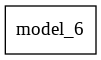

In [ ]:
plot_model(decoder_model , to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
reverse_input_char_index = dict((i, char) for char, i in input_token_index.items())
reverse_target_char_index = dict((i, char) for char, i in target_token_index.items())


def decode_sequence(input_seq):
    # Encode the input as state vectors.
    states_value = encoder_model.predict(input_seq)

    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1, 1, num_decoder_tokens))
    # Populate the first character of target sequence with the start character.
    target_seq[0, 0, target_token_index["\t"]] = 1.0

    # Sampling loop for a batch of sequences
    # (to simplify, here we assume a batch of size 1).
    stop_condition = False
    decoded_sentence = ""
    while not stop_condition:
        output_tokens, h, _ = decoder_model.predict([target_seq] + states_value)

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_char = reverse_target_char_index[sampled_token_index]
        decoded_sentence += sampled_char

        # Exit condition: either hit max length
        # or find stop character.
        if sampled_char == "\n" or len(decoded_sentence) > max_decoder_seq_length:
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1, 1, num_decoder_tokens))
        target_seq[0, 0, sampled_token_index] = 1.0

        # Update states
        states_value = [h, c]
    return decoded_sentence



In [ ]:
for seq_index in range(5):
    # Take one sequence (part of the training set)
    # for trying out decoding.
    input_seq = encoder_input_data[seq_index : seq_index + 1]
    decoded_sentence = decode_sequence(input_seq)
    print("-")
    print("Input sentence:", input_texts[seq_index])
    print("Decoded sentence:", decoded_sentence)

ValueError: ignored